In [20]:
import pandas as pd
hour = pd.read_csv('data/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
print(hour['count'].mean())
print(hour['count'].median())
print(hour['count'].std())

189.46308763450142
142.0
181.38759909186473


In [22]:
print(hour["registered"].min())
print(hour["registered"].max())

0
886


In [23]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [24]:
hour.loc[3, "count"]

13

In [25]:
hour.loc[2:4, "count"]

2    32
3    13
4     1
Name: count, dtype: int64

In [26]:
hour.loc[hour["hr"]<5, "registered"].mean()

20.7881427367238

In [27]:
print(hour.loc[(hour["hr"]<5) & (hour["temp"]<.50), "count"].mean())
print(hour.loc[(hour["hr"]<5) & (hour["temp"]>.50), "count"].mean())

19.521104742053154
33.639322916666664


In [28]:
hour.groupby(["season"])["count"].mean()

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64

In [29]:
hour.groupby(["season", "holiday"])["count"].mean()

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64

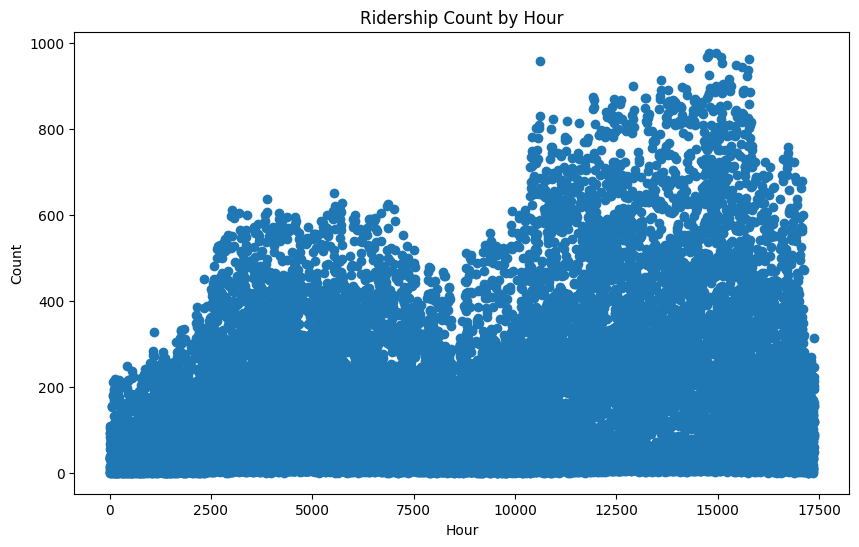

In [30]:
import matplotlib.pyplot as plt
fix, ax = plt.subplots(figsize=(10, 6))
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour")
ax.scatter(x = hour["instant"], y = hour["count"])
plt.show()

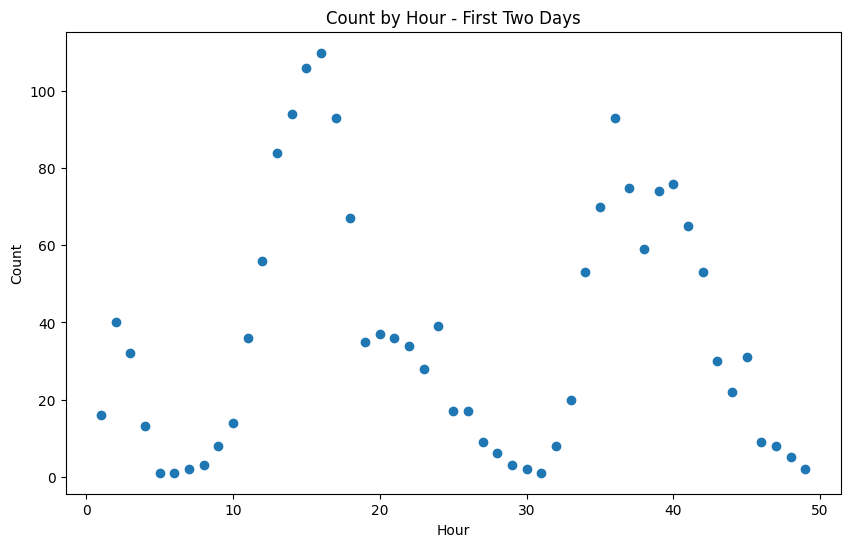

In [31]:
hour_first48 = hour.loc[0:48, :]
fix, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour_first48["instant"], y = hour_first48["count"])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

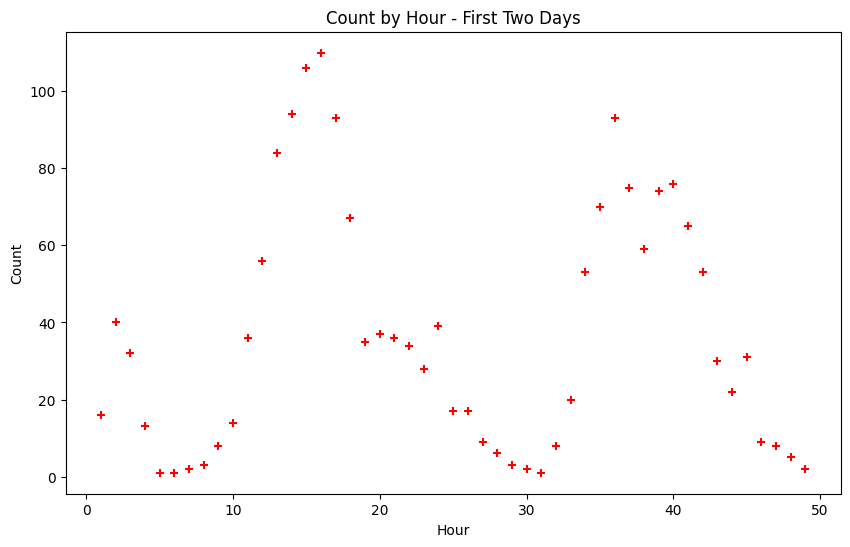

In [32]:
fix, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour_first48["instant"], y = hour_first48["count"], c = "red", marker= "+")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

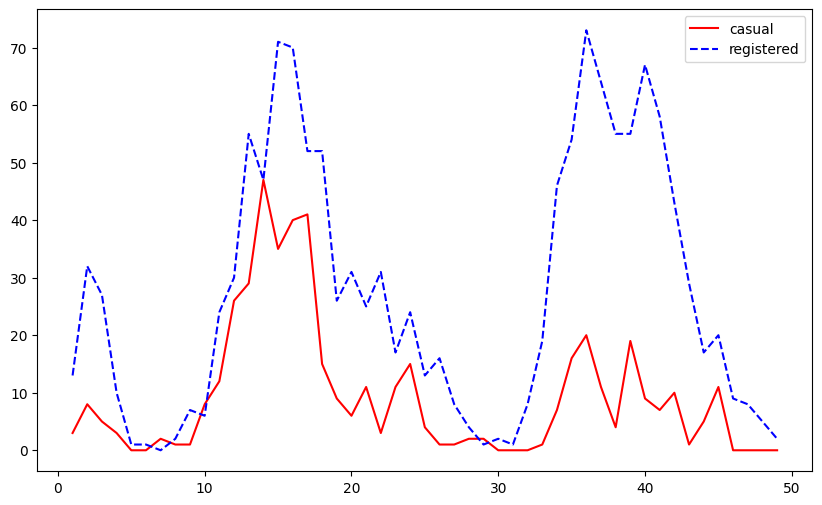

In [33]:
fix, ax = plt.subplots(figsize=(10, 6))
ax.plot(hour_first48["instant"], hour_first48["casual"], c= "red", label= "casual", linestyle="-")
ax.plot(hour_first48["instant"], hour_first48["registered"], c= "blue", label= "registered", linestyle="--")
ax.legend()

Text(0.5, 1.0, 'Counts by Hour')

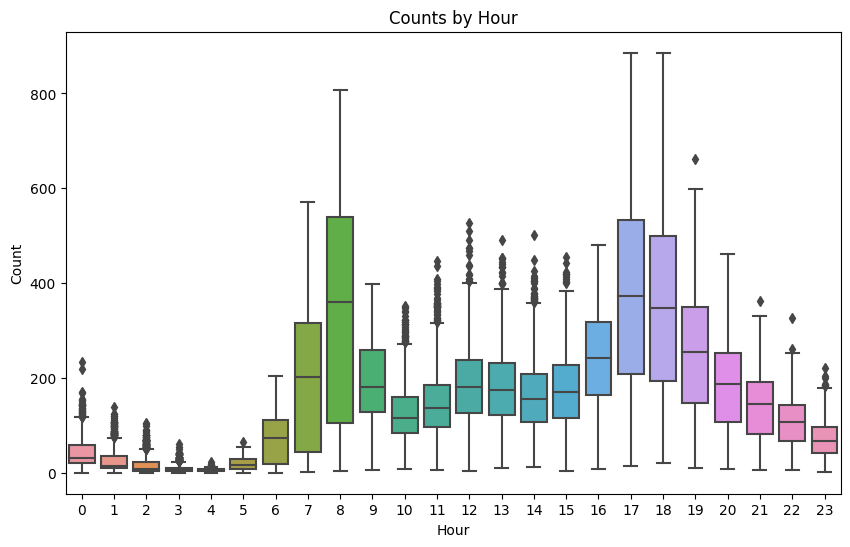

In [35]:
import seaborn as sns
fix, ax, plt.subplots(figsize=(10, 6))
sns.boxplot(x="hr", y="registered", data=hour)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Counts by Hour")

Text(0.5, 1.0, 'Ridership Histogram')

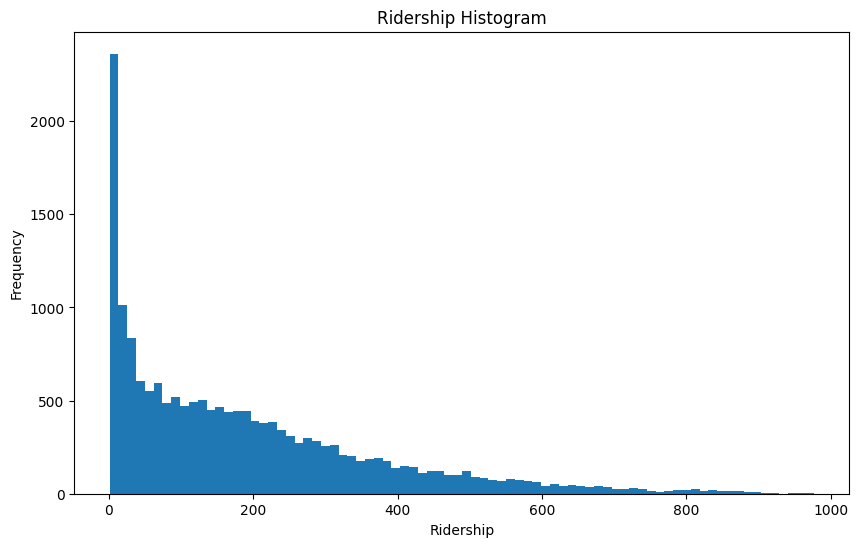

In [37]:
fix, ax, = plt.subplots(figsize=(10, 6))
ax.hist(hour["count"], bins=80)
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Ridership Histogram")

/Users/drewlitman/Code/DiveIntoData/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


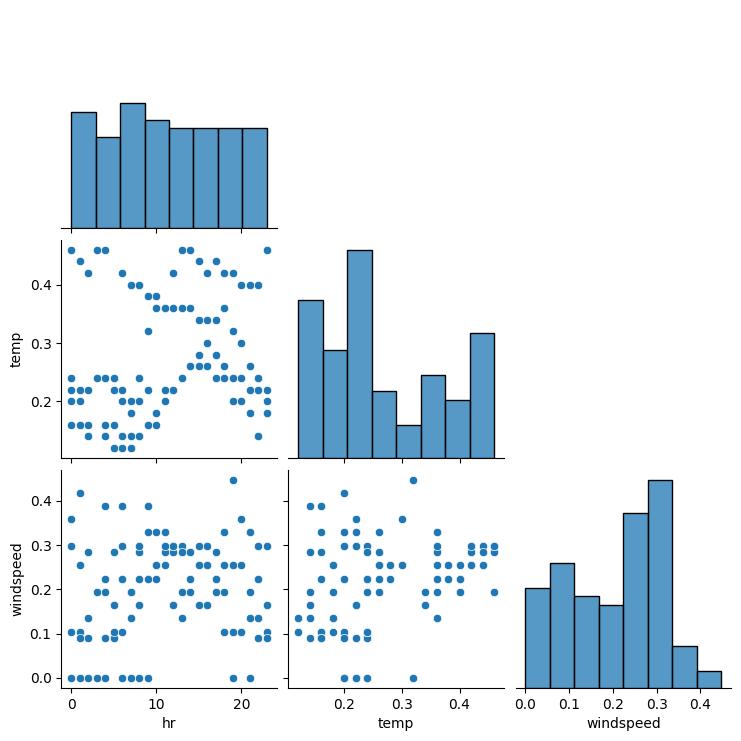

In [38]:
theVariables = ["hr", "temp", "windspeed"]
hour_first100 = hour.loc[0:100, theVariables]
sns.pairplot(hour_first100, corner=True)hour

In [39]:
print(hour["casual"].corr(hour["registered"]))
print(hour["temp"].corr(hour["hum"]))

0.5066177004294635
-0.06988139105119345


In [41]:
cor_matrix = hour[theVariables].corr()
cor_matrix

,hr,temp,windspeed
hr,1.000000,0.137603,0.137252
temp,0.137603,1.000000,-0.023125
windspeed,0.137252,-0.023125,1.000000


<Axes: >

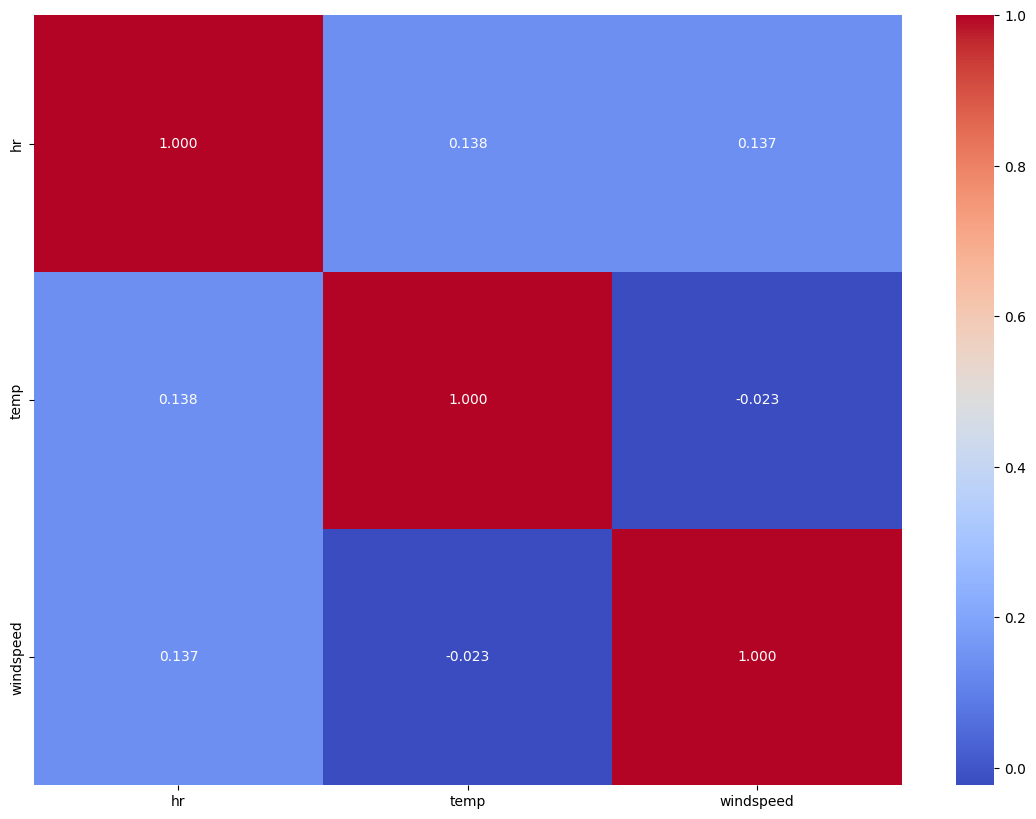

In [50]:
plt.figure(figsize=(14, 10))
corr = hour[theVariables].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt="0.3f", xticklabels=theVariables, yticklabels=theVariables)

<Axes: xlabel='weekday', ylabel='hr'>

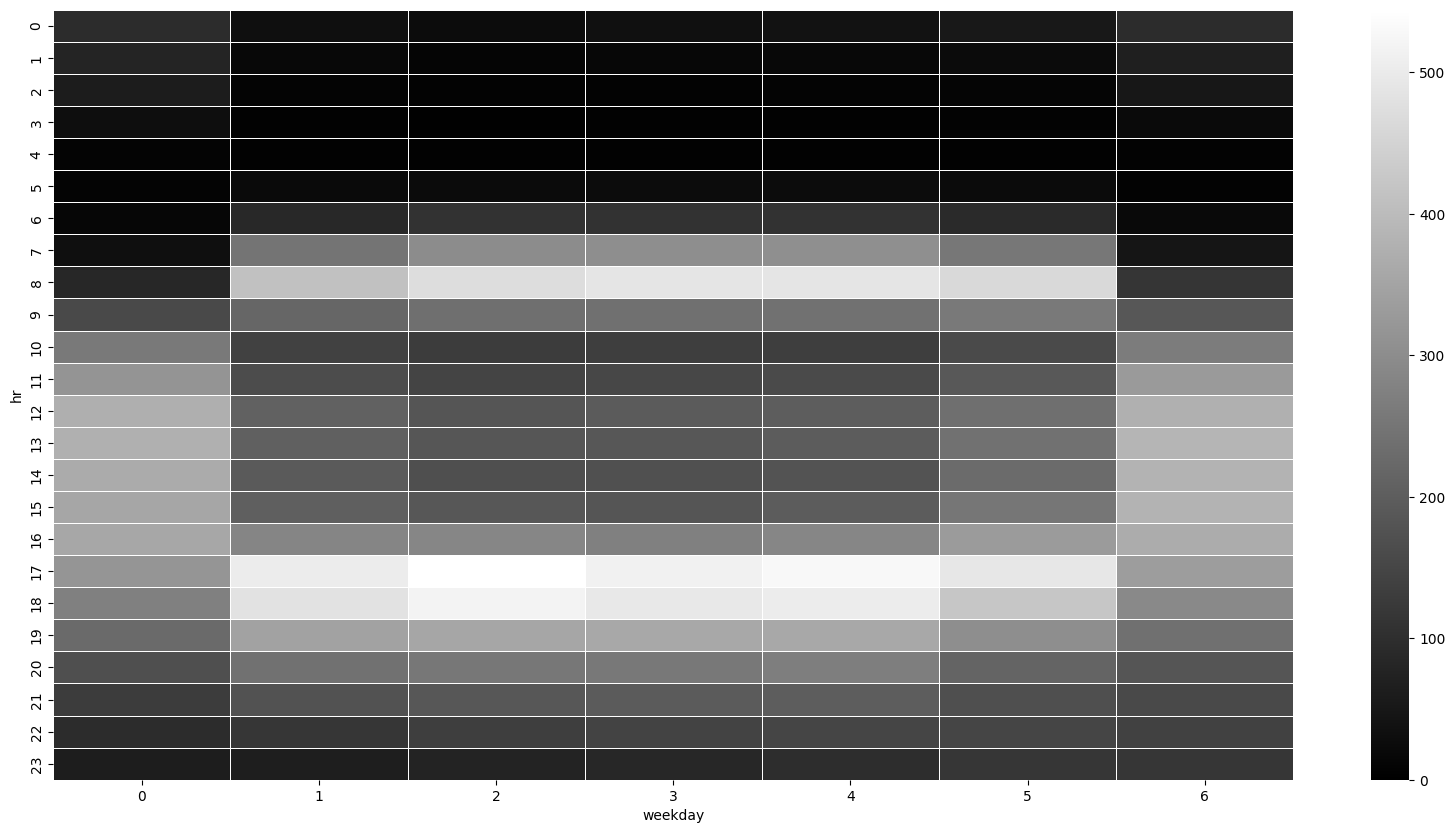

In [51]:
# Create a pivot table
df_hm = hour.pivot_table(index="hr", columns="weekday", values="count")

# Draw a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df_hm, fmt="d", cmap="binary_r", linewidths=0.5, vmin=0)